In [27]:
# metrics: 1,2,3 euclidean, standard euclidean, cityblock
# methods: a,b,c closest neighbor, furthest neighbor, average
# file: data1.docx

## Parse docx table

In [28]:

import docx
import pandas as pd
import numpy as np

filename = 'data1.docx'
doc = docx.Document(filename)

table = doc.tables[0]

# fill array 
ls = []
for row in table.rows:
    row_arr = []
    for cell in row.cells:
        row_arr.append(cell.paragraphs[0].text)
    ls.append(row_arr)

column_names = ls[0]


# clear array
clear_ls = []
for i in range(1, len(ls)-1):
    row = ls[i]
    if row[0] == '':
        continue
    row[0] = int(row[0][-4:])
    for j in range(1, len(row)):
        row[j] = float(row[j].replace(',', '.'))
        
    clear_ls.append(row)
    
# create dataframe
df = pd.DataFrame(clear_ls, columns=column_names)
df.head()


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1973,92.694,83.870,91.581,88.407,85.844,79.121,79.428,84.400,81.157,92.151,85.784,88.466
1,1974,85.815,78.919,85.190,83.371,79.764,74.245,73.247,76.037,70.511,82.625,83.107,86.454
2,1975,80.824,74.496,83.380,82.132,79.818,76.307,80.037,75.311,73.606,80.468,80.761,85.867
3,1976,84.395,78.024,84.910,85.940,81.650,75.785,73.108,76.539,74.125,85.257,80.926,83.110
4,1977,86.944,91.751,100.826,84.474,85.697,76.247,72.499,76.453,75.446,84.828,86.300,89.536


## Normalize dataframe

In [29]:
# Normalize dataframe
X = df.iloc[:, 1:].values
X = (X - X.mean(axis=0))/X.std(axis=0)



In [30]:
X.mean(axis=0)

array([ 2.85485921e-16, -6.74063979e-17, -4.36159045e-17, -1.47699313e-16,
       -6.27804687e-17,  2.04862582e-16,  2.17088252e-16,  1.36464913e-16,
       -2.27331381e-16, -1.30847714e-16,  1.85037171e-17, -5.68328453e-17])

In [31]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Clusterize

## Distance and units

In [32]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# first two are indices of elements, third is distance between them, last is amount of units in cluster
Z = linkage(X, method='average', metric='euclidean')
for i in range(len(Z)):
    print(*Z[i], sep='      ')

1.0      3.0      0.06752296712446733      2.0
2.0      42.0      0.09962794849594563      3.0
0.0      4.0      0.1828502843623948      2.0
8.0      9.0      0.19844629984056333      2.0
10.0      12.0      0.20769218093545663      2.0
43.0      44.0      0.22198202299836156      5.0
5.0      45.0      0.24557009539240496      3.0
7.0      46.0      0.2937612369485425      3.0
23.0      24.0      0.325060231800348      2.0
11.0      48.0      0.33028223238743754      4.0
29.0      30.0      0.37366872313739635      2.0
49.0      51.0      0.37961606288368477      7.0
15.0      16.0      0.4216510253159996      2.0
14.0      53.0      0.4316792167513416      8.0
22.0      40.0      0.4361250707814187      2.0
6.0      54.0      0.4439012759591553      3.0
47.0      55.0      0.45564553067019264      13.0
25.0      39.0      0.4581279905484807      2.0
50.0      56.0      0.5185169244991533      4.0
31.0      33.0      0.550092534573685      2.0
19.0      20.0      0.643960319895643    

## Dendrogram

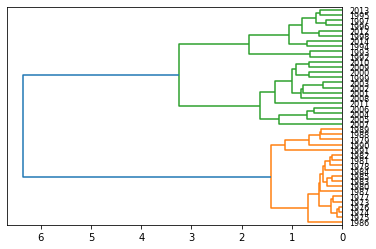

In [33]:
dend = dendrogram(Z, orientation='left', labels=df.year.values)

## Clusters

In [34]:
label = fcluster(Z, 1.3, criterion='distance')
np.unique(label)

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [35]:
df.loc[:, 'label'] = label
for i, group in df.groupby('label'):
    print('==========')
    print(f'cluster {i}')
    print(group)

cluster 1
    year      Jan      Feb      Mar     Apr     May     Jun     Jul     Aug  \
0   1973   92.694   83.870   91.581  88.407  85.844  79.121  79.428  84.400   
1   1974   85.815   78.919   85.190  83.371  79.764  74.245  73.247  76.037   
2   1975   80.824   74.496   83.380  82.132  79.818  76.307  80.037  75.311   
3   1976   84.395   78.024   84.910  85.940  81.650  75.785  73.108  76.539   
4   1977   86.944   91.751  100.826  84.474  85.697  76.247  72.499  76.453   
5   1978   85.796   77.256   85.621  78.313  73.829  68.327  71.557  73.604   
7   1980  118.006  108.192  108.648  77.257  70.207  61.256  60.600  59.966   
8   1981   91.149   84.706   79.820  69.337  62.377  64.923  66.184  64.450   
9   1982   98.077   85.337   81.648  71.591  65.324  61.213  66.839  60.809   
10  1983  112.108   94.673   85.912  73.644  61.135  58.866  58.094  55.511   
11  1984   97.339   68.900   69.161  71.215  65.967  59.292  55.459  54.104   
12  1985  103.893   99.497   89.554  75.51

## Let's visualize

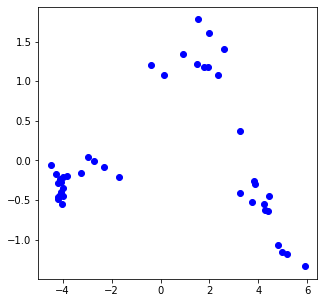

In [36]:
from sklearn import decomposition, preprocessing
import matplotlib.pyplot as plt

scaler = preprocessing.StandardScaler()
normalized_df = scaler.fit_transform(df)

pca = decomposition.PCA(n_components=2, random_state=4)
x, y = pca.fit_transform(normalized_df).T

plt.figure(figsize=(5,5))
plt.scatter(x, y, color='blue')
plt.show()


## Derive cophenet correlation coefficient

In [37]:
from collections import defaultdict
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# single - closest, complete - farthest
methods = ['single', 'complete', 'average']
metrics = ['euclidean', 'seuclidean', 'cityblock']

# distances dictionary
dist_dict = {}
for m in metrics:
    dist_dict[m] = pdist(normalized_df, m)


cophenets = np.zeros((len(methods), len(metrics)))
clustered_instances = defaultdict(dict)


for d_index, (metric, distance) in enumerate(dist_dict.items()):
    for m_index, method in enumerate(methods):

        clustered_unit = linkage(distance, method)
        cophenet_unit = cophenet(clustered_unit, distance)[0]

        clustered_instances[metric][method] = clustered_unit
        cophenets[d_index][m_index] = cophenet_unit


cophenet_df = pd.DataFrame(cophenets, metrics, methods)




## Distances

In [38]:
dist_dict

 8.98117295,
         9.20137044,  8.8347513 ,  9.93436485,  8.41652985,  7.85060285,
         7.84168704,  7.3136853 ,  6.8457575 ,  6.30071246,  5.95358698,
         0.36154968,  0.26208218,  0.59717802,  0.56715161,  1.18465333,
         1.46701387,  1.84958495,  2.44068333,  4.02339764,  4.46440276,
         5.30052038,  5.80565097,  6.05542442,  6.20387962,  6.57523278,
         7.29125849,  7.80538767,  8.30774866,  8.42790491,  8.24653702,
         9.01488059,  9.23078182,  8.86822173,  9.96149214,  8.43011666,
         7.86133728,  7.85027726,  7.31351731,  6.85618036,  6.30111671,
         5.94340852,  0.4133973 ,  0.42996957,  0.57928227,  1.31956796,
         1.57195523,  1.95460194,  2.57449875,  4.14449856,  4.60583211,
         5.43848464,  5.95781673,  6.19946926,  6.35018808,  6.72483944,
         7.45411762,  7.96951879,  8.47931614,  8.58887098,  8.40960649,
         9.18430922,  9.40572182,  9.02696551, 10.12968249,  8.60807896,
         8.03276704,  8.02016881,  7.4

## Cophenets table

In [39]:
cophenet_df

,single,complete,average
euclidean,0.879090,0.889353,0.896700
seuclidean,0.879090,0.889353,0.896700
cityblock,0.856693,0.813760,0.893745


## Let's find out which metric and method are best

In [40]:
pd.DataFrame([cophenet_df.idxmax(), cophenet_df.max()])

,single,complete,average
0,seuclidean,seuclidean,seuclidean
1,0.87909,0.889353,0.8967


## Now check worst ones

In [41]:
pd.DataFrame([cophenet_df.idxmin(), cophenet_df.min()])

,single,complete,average
0,cityblock,cityblock,cityblock
1,0.856693,0.81376,0.893745


## Check best clustered instance

In [42]:
best_metric = 'seuclidean'
best_method = 'average'

best_clustered = clustered_instances[best_metric][best_method]
best_clustered

array([[ 1.        ,  2.        ,  0.12658996,  2.        ],
       [ 3.        , 42.        ,  0.15258829,  3.        ],
       [ 8.        ,  9.        ,  0.21233891,  2.        ],
       [10.        , 12.        ,  0.26208218,  2.        ],
       [ 0.        , 43.        ,  0.2736123 ,  4.        ],
       [ 4.        ,  5.        ,  0.30737067,  2.        ],
       [23.        , 24.        ,  0.33135006,  2.        ],
       [44.        , 45.        ,  0.34335482,  4.        ],
       [46.        , 47.        ,  0.35071201,  6.        ],
       [11.        , 49.        ,  0.372286  ,  5.        ],
       [29.        , 30.        ,  0.37808511,  2.        ],
       [15.        , 16.        ,  0.42450091,  2.        ],
       [22.        , 48.        ,  0.45969377,  3.        ],
       [ 7.        , 51.        ,  0.48306017,  6.        ],
       [31.        , 32.        ,  0.563406  ,  2.        ],
       [14.        , 55.        ,  0.58869333,  7.        ],
       [17.        , 53.

## Build a dendrogram for best metric+method

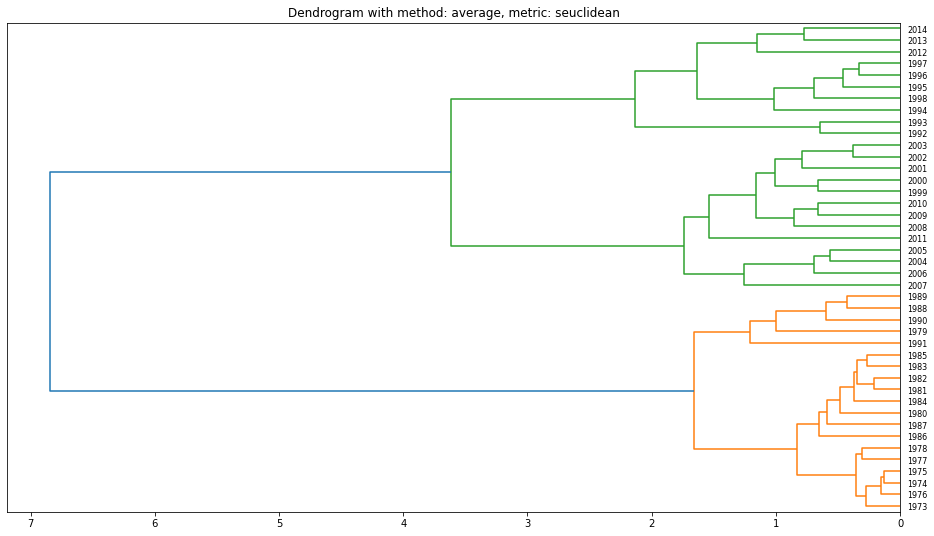

In [43]:
plt.figure(figsize=(16, 9))
plt.title('Dendrogram with method: {0}, metric: {1}'.format(best_method, best_metric))

dendro_best = dendrogram(Z=best_clustered, labels=df.year.values, orientation='left')
plt.show()

## Now let's determine number of likely clusters

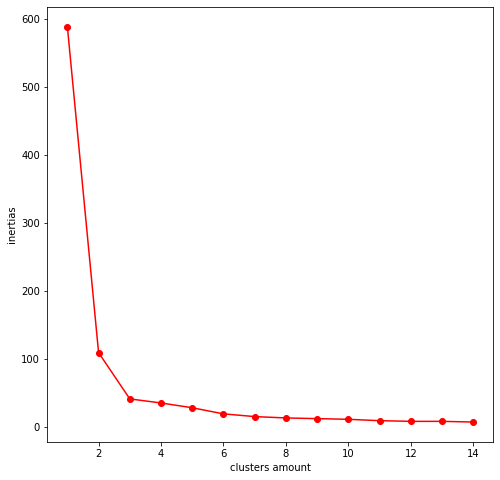

In [44]:
# We will use elbow method
min_clusters = 1
max_clusters = 15

n_clusters = np.arange(min_clusters, max_clusters)
inertias = np.zeros_like(n_clusters)

for i, num in enumerate(n_clusters):
    targets = fcluster(best_clustered, num, 'maxclust')
    result = pd.DataFrame(normalized_df)
    result['target'] = targets

    centroids = result.groupby('target').agg(np.mean).values
    inertia = np.square(normalized_df - centroids[targets - 1]).sum()
    inertias[i] = inertia


# set plot
plt.figure(figsize=(8,8))
plt.xlabel('clusters amount')
plt.ylabel('inertias')
plt.plot(n_clusters, inertias, '-ro')

## Now let's divide data on clusters

In [45]:
n_clusters = 3
targets = fcluster(Z=best_clustered, t=n_clusters, criterion='maxclust')
target_df = pd.DataFrame(normalized_df, columns=df.columns)
target_df['target'] = targets

## Check out centroids and distances

In [47]:
centroids = target_df.groupby('target').agg(np.mean).values
centroids

array([[-0.94877298, -0.99586602, -1.00450525, -1.00205036, -1.00149147,
        -1.00316945, -1.00098825, -0.98815527, -0.99931892, -1.00866761,
        -1.00287391, -1.00745161, -0.99393011, -0.92844037],
       [ 0.94877298,  1.23733297,  1.23944521,  1.23875607,  1.23114724,
         1.20534999,  1.2147619 ,  1.24871912,  1.23061398,  1.21117797,
         1.2195145 ,  1.19156586,  1.23903616,  0.18271337],
       [ 0.56926379,  0.28361257,  0.29728119,  0.2935128 ,  0.30234239,
         0.33906697,  0.3226872 ,  0.25416016,  0.29890777,  0.34193709,
         0.32009157,  0.36512244,  0.27772021,  1.52650932]])

In [48]:
pdist(centroids)  # distance between centroids

array([8.01969945, 5.37580449, 3.47539632])

## Data clusters visualization

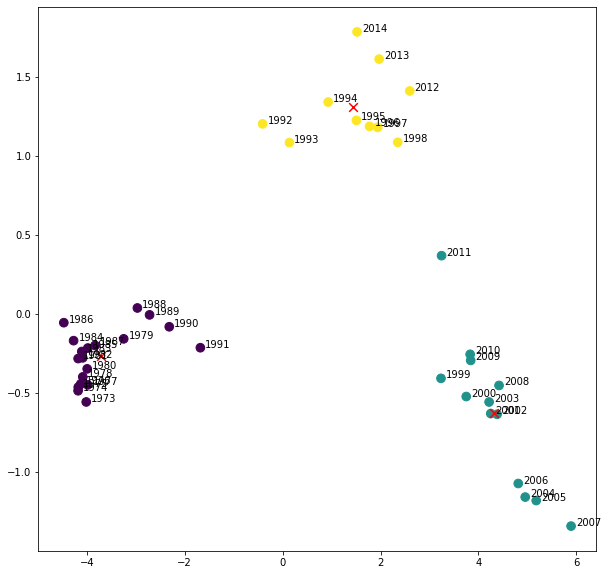

In [50]:
target2d = pd.DataFrame({'x': x, 'y': y, 'target': targets})

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=targets, s=75)

for i, lbl in enumerate(df.year.values):
    plt.annotate(text=lbl, xy=(x[i]+0.1, y[i]))

plt.scatter(x='x', y='y', s=75, color='r', marker='x', data=target2d.groupby('target').agg('mean'))
plt.show()